In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [22]:
df = pd.read_csv('all_variable_again.csv')
df.head()

,task_id,worker_id,timestamp,accuracy,keypress_keytypeint,keytype_changed,mouseclick_button,mousemove_distance,work_duration,mousemove_distance_time,...,161,162,163,164,165,166,167,168,speed,error
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,1.470270e+12,0,6.879310,0.517241,0.068966,19.722592,88.318,12.952177,...,0.0,0.017241,0.034483,0.0,0.0,0.000000,0.0,0.0,0.656718,1
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,1.470270e+12,1,3.463768,0.217391,0.376812,7.173393,34.392,14.391838,...,0.0,0.000000,0.000000,0.0,0.0,0.014493,0.0,0.0,2.006281,0
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,1.470270e+12,1,4.918367,0.346939,0.061224,22.958495,18.640,60.352267,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,2.628755,0
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,1.470270e+12,0,6.209302,0.372093,0.093023,8.415718,15.841,22.844257,...,0.0,0.000000,0.000000,0.0,0.0,0.023256,0.0,0.0,2.714475,1
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,1.470270e+12,1,5.755556,0.333333,0.155556,2.868044,15.844,8.145797,...,0.0,0.000000,0.000000,0.0,0.0,0.022222,0.0,0.0,2.840192,0


In [23]:
df.columns

Index(['task_id', 'worker_id', 'timestamp', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'work_duration', 'mousemove_distance_time',
       ...
       '161', '162', '163', '164', '165', '166', '167', '168', 'speed',
       'error'],
      dtype='object', length=183)

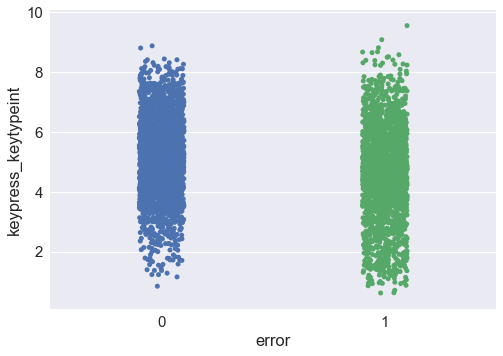

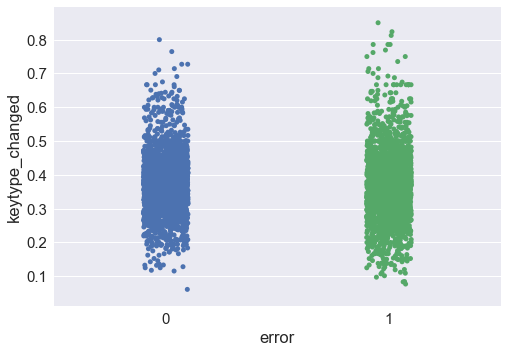

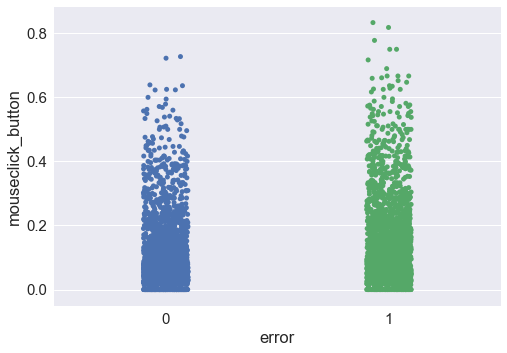

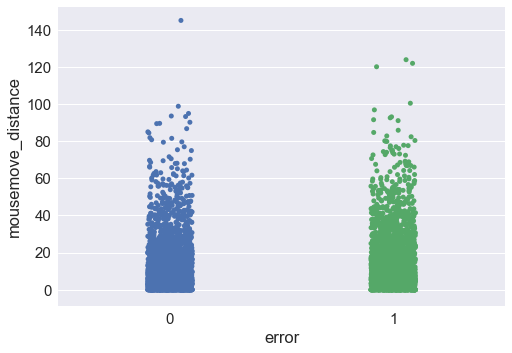

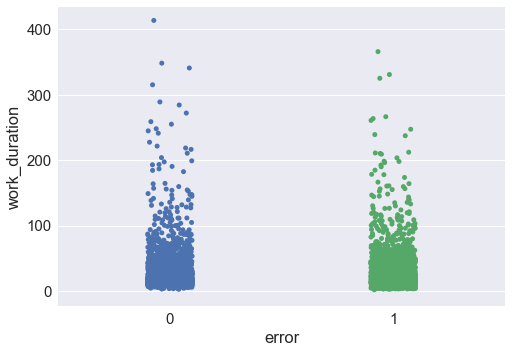

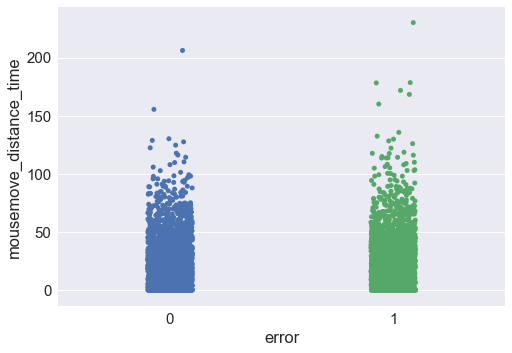

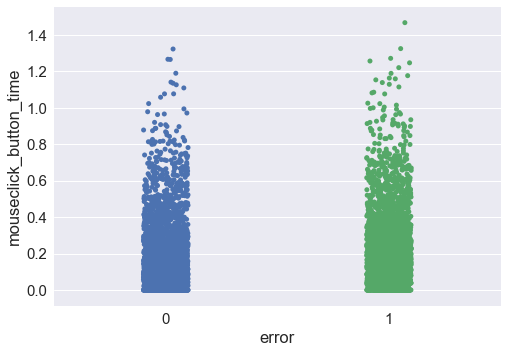

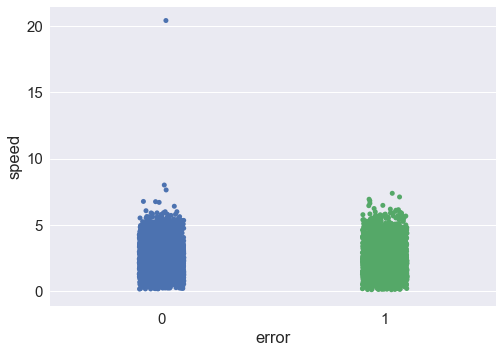

In [30]:
col = ['keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'work_duration', 'mousemove_distance_time','mouseclick_button_time','speed']

sns.set(font_scale = 1.5)

for item in col:
    plt.figure()
    sns.stripplot(x='error' ,y=item , data=df, jitter = True)



In [25]:
col = ['keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'work_duration', 'mousemove_distance_time','mouseclick_button_time','speed']

for item in col:
    cor = df[item].corr(df['error'])
    print ('---------/n')
    print ('Correlation between %f and Error is %f', item, cor)
    

---------/n
Correlation between %f and Error is %f keypress_keytypeint -0.204230524146
---------/n
Correlation between %f and Error is %f keytype_changed -0.0100841786791
---------/n
Correlation between %f and Error is %f mouseclick_button 0.146591374453
---------/n
Correlation between %f and Error is %f mousemove_distance 0.0767848382577
---------/n
Correlation between %f and Error is %f work_duration 0.00432646306286
---------/n
Correlation between %f and Error is %f mousemove_distance_time 0.0739078965894
---------/n
Correlation between %f and Error is %f mouseclick_button_time 0.136382702345
---------/n
Correlation between %f and Error is %f speed -0.0324401586876


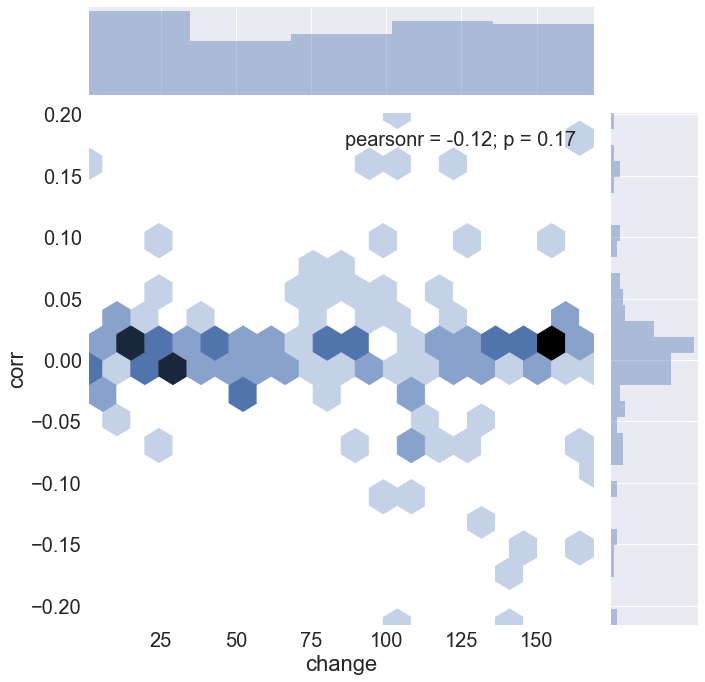

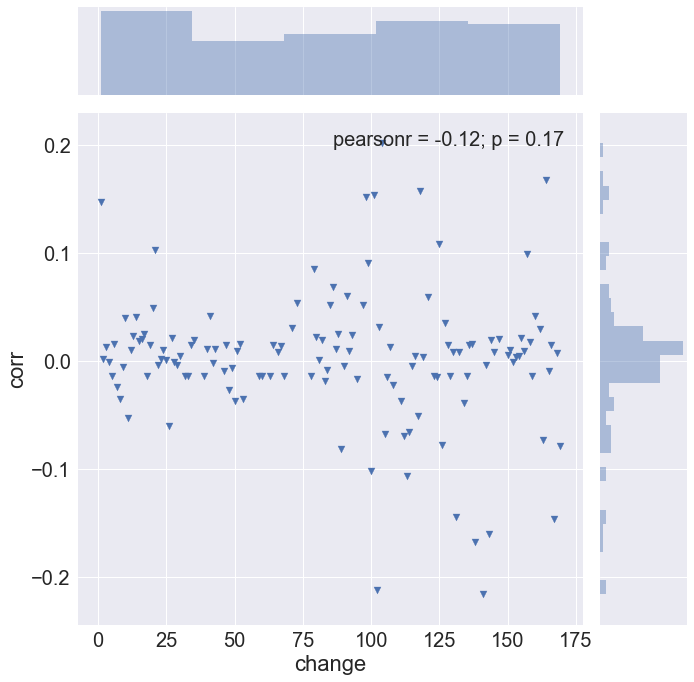

In [39]:
cor = np.empty([])

for i in range(12,181):
    cor_temp = df[df.columns[i]].corr(df['error'])
    cor = np.append(cor, cor_temp)
    
cor_df = pd.DataFrame(cor)
cor_df.reset_index(inplace= True)
cor_df.columns=['change','corr']
cor_df.drop(cor_df.index[0:1],inplace =True)

sns.set(font_scale=2)
fig1 = ax.get_figure()
sns.jointplot(x='change',y='corr',data=cor_df,size=10,kind='hex')
fig.savefig('density.png')
plt.close(fig1)

fig2 = ax.get_figure()
sns.jointplot(x='change',y='corr',data=cor_df,size=10,marker='v')
fig.savefig("169_corre.png")
plt.close(fig2)




In [18]:
df = pd.read_csv('all_variable_master.csv')

df2=df[['Education', 'Sex', 'exp', 'speed', 'work_duration',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'keytype_changed_time','mouseclick_button_time','mousemove_distance_time','error']]
corrmat = df2.corr()
fig, ax = plt.subplots(figsize=(19, 18))
sns.set(font_scale=1.5)
ax.get_figure()
sns.heatmap(corrmat, vmax=.25, square=True ,annot=True)
fig.savefig("correlation.png")
plt.close(fig)

Random Forrest
[[1069  224]
 [ 480  727]]
             precision    recall  f1-score   support

          0       0.69      0.83      0.75      1293
          1       0.76      0.60      0.67      1207

avg / total       0.73      0.72      0.71      2500



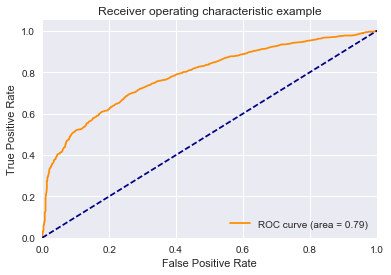

Area Under the ROC Curve is  0.78596303722


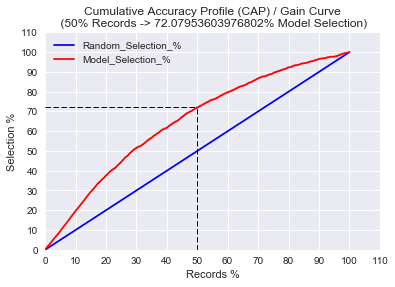

In [21]:
data = pd.read_csv('all_variable_again.csv')
x = data[data.columns[5:182]]
y =data['error']

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

#Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )


#3) Random Forrest
print ('Random Forrest')

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500)
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

fig = plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC.png', dpi=400)
print('Area Under the ROC Curve is ', roc_auc[1])
plt.close(fig)




#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight',dpi=400)
plt.close(fig)


Random Forrest
[[1071  222]
 [ 477  730]]
             precision    recall  f1-score   support

          0       0.69      0.83      0.75      1293
          1       0.77      0.60      0.68      1207

avg / total       0.73      0.72      0.72      2500



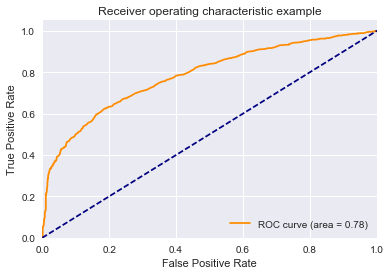

Area Under the ROC Curve is  0.783280502816


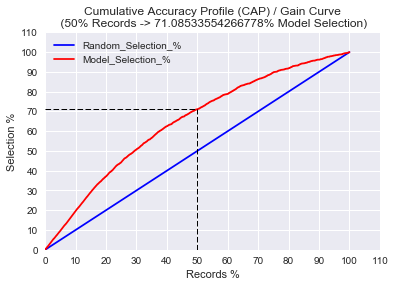

In [5]:
data = pd.read_csv('all_variable.csv')
x = data[data.columns[5:181]]
y =data['error']

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

#Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )


#3) Random Forrest
print ('Random Forrest')

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 600)
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])
#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)
